# Setup

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("ggplot")
sns.set(font_scale=1.1)

# Reproducibility
np.random.seed(42)

# Load Monthly AUM Table

In [48]:
monthly_aum_df = pd.read_csv("../data/monthly_aum_table.csv", parse_dates=["month"])

# Preview
monthly_aum_df.head()

,ticker_id,provider,month,net_flow,total_assets
0,AAPL,BlackRock,2023-12-01,0.000000e+00,1.624022e+09
1,AAPL,BlackRock,2024-01-01,1.750167e+08,1.799039e+09
2,AAPL,BlackRock,2024-02-01,1.377590e+08,1.936798e+09
3,AAPL,BlackRock,2024-03-01,-7.168560e+08,1.219942e+09
4,AAPL,BlackRock,2024-04-01,8.298894e+08,2.049831e+09


# Aggregate AUM by Provider and Month

In [49]:
provider_monthly_aum = (
    monthly_aum_df
    .groupby(["provider", "month"])["total_assets"]
    .sum()
    .reset_index()
    .sort_values(["provider", "month"])
)

# Preview result
provider_monthly_aum.head()

,provider,month,total_assets
0,BlackRock,2023-12-01,5.148362e+10
1,BlackRock,2024-01-01,5.424262e+10
2,BlackRock,2024-02-01,6.284630e+10
3,BlackRock,2024-03-01,7.104322e+10
4,BlackRock,2024-04-01,6.776831e+10


# Visualize

## Monthly AUM per provider

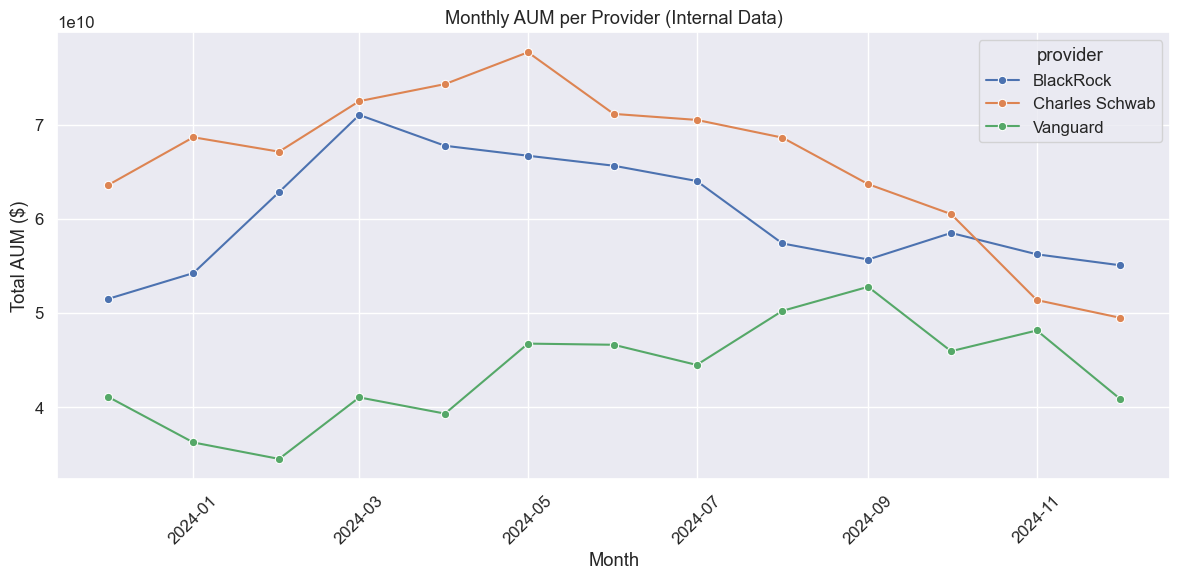

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=provider_monthly_aum, x="month", y="total_assets", hue="provider", marker="o")
plt.title("Monthly AUM per Provider (Internal Data)")
plt.xlabel("Month")
plt.ylabel("Total AUM ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

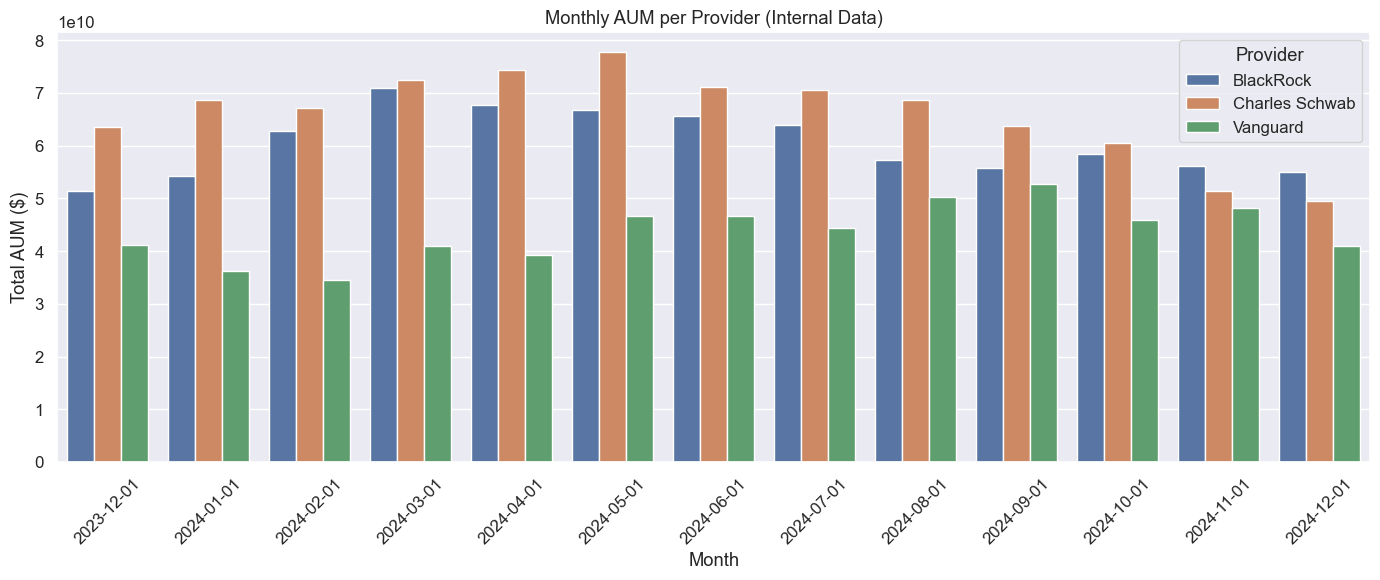

In [51]:
# Cell 5: Bar chart of monthly AUM per provider

plt.figure(figsize=(14, 6))
sns.barplot(
    data=provider_monthly_aum,
    x="month",
    y="total_assets",
    hue="provider"
)

plt.title("Monthly AUM per Provider (Internal Data)")
plt.xlabel("Month")
plt.ylabel("Total AUM ($)")
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title="Provider")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

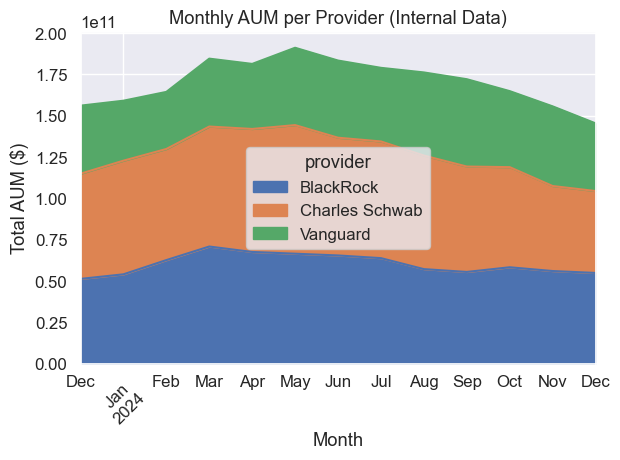

In [52]:
# Pivot data for area chart
area_df = provider_monthly_aum.pivot(index="month", columns="provider", values="total_assets").fillna(0)

# Plot stacked area chart
plt.figure(figsize=(12, 6))
area_df.plot.area()
plt.title("Monthly AUM per Provider (Internal Data)")
plt.ylabel("Total AUM ($)")
plt.xlabel("Month")
plt.ylim(bottom=0)  # Force y-axis to start at 0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
